In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data-sets/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.isnull().sum()

Unnamed: 0    0
cgpa          0
iq            0
placement     0
dtype: int64

In [6]:
df.shape

(100, 4)

# Steps :
# 1.Preprocess + EDA + Feature selection
# 2.Extract input and output cols
# 3.Scale the values
# 4.Train test split (also known as cross validation)
# 5.Train the model
# 6.Evaluate the model / Model selection
# 7.Deploy the model

In [7]:
df.shape

(100, 4)

In [8]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [9]:
(df.isnull().sum() / df.shape[0] )*100

Unnamed: 0    0.0
cgpa          0.0
iq            0.0
placement     0.0
dtype: float64

In [10]:
#Removing the unnecessary column (Unnamed: 0)
df=df.drop(columns=['Unnamed: 0'])

In [11]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


# EDA

C:\Python anaconda setip 2.0\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


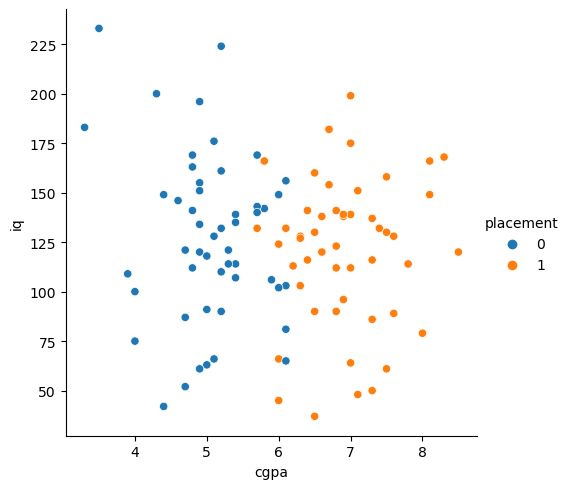

In [12]:
sns.relplot(kind='scatter',x='cgpa',y='iq',data=df,hue='placement')

In [13]:
# here cgpa and iq are independent variable and placement is an dependent variable as placement depends upon cgpa and iq

# 2.Extract input and output cols


In [14]:
# iloc and loc method are used for extracting data from a panda dataframe
# 1.loc :
#     loc is used to access a group of rows and columns by label(s)
#     for eg : df.loc[:,['cgpa','iq']]
#         i.e it selects all the rows of data set set and 2 columns 'iq' and 'cgpa'

# 2.iloc :
#     iloc is used for integer-location based indexing
#     for eg : df.iloc(:,0:2)
#                 i.e it selects all the rows of data set set and 2 columns ie 0th and 1st


In [15]:
#Extracting the inputs columns i.e iq and cgpa
x= df.iloc[:,0:2]   #df[[iq,cgpa]]
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
#Extracting the outputs columns
y=df.iloc[:,2:]
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


# 4.Train test split (also known as cross validation)


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
#train_test_split() function takes 3 paramenters : independent varaibales (input columns/features/ predictor variables ),
#  dependent variables (output columns/ target variable or response variable)  and percentage of data to be used in test

In [18]:
x_train

,cgpa,iq
67,5.0,118.0
96,4.4,42.0
93,6.8,112.0
71,6.1,132.0
19,5.2,132.0
...,...,...
9,5.1,66.0
99,6.2,113.0
95,4.3,200.0
54,6.4,141.0


In [19]:
y_train

,placement
67,0
96,0
93,1
71,1
19,0
...,...
9,0
99,1
95,0
54,1


In [20]:
x_test

,cgpa,iq
44,7.5,61.0
42,7.6,89.0
26,7.0,199.0
78,6.1,81.0
34,4.8,163.0
5,7.1,48.0
47,5.2,161.0
65,8.1,166.0
45,6.0,66.0
38,6.5,160.0


In [21]:
y_test

,placement
44,1
42,1
26,1
78,0
34,0
5,1
47,0
65,1
45,1
38,1


# 3.Scale the values


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
x_train=scaler.fit_transform(x_train)
x_train

array([[-8.17079103e-01, -1.58906781e-01],
       [-1.34739487e+00, -2.15692587e+00],
       [ 7.73868189e-01, -3.16645130e-01],
       [ 1.55166464e-01,  2.09149367e-01],
       [-6.40307182e-01,  2.09149367e-01],
       [ 7.73868189e-01, -2.74581571e-02],
       [ 1.65772780e+00, -2.64065681e-01],
       [ 1.55166464e-01, -5.53252654e-01],
       [-4.63535261e-01,  2.88018541e-01],
       [ 2.27642952e+00, -1.06327332e-01],
       [ 1.21579799e+00, -1.94660807e+00],
       [-5.51921221e-01, -2.64065681e-01],
       [ 1.39256991e+00,  1.56569917e-01],
       [ 1.55166464e-01,  8.40102763e-01],
       [ 4.20324347e-01, -2.11486231e-01],
       [ 1.21579799e+00,  3.40597991e-01],
       [-1.09991418e-01,  4.72046615e-01],
       [-1.17062295e+00,  5.77205514e-01],
       [-1.08223699e+00, -9.73888252e-01],
       [ 8.62254150e-01,  3.93177441e-01],
       [ 9.50640111e-01, -3.16645130e-01],
       [ 5.97096268e-01,  3.66887716e-01],
       [-1.98377378e-01,  4.19467165e-01],
       [ 5.

In [24]:
x_test=scaler.fit_transform(x_test)
x_test


array([[ 0.89712882, -1.11270598],
       [ 0.99571441, -0.57921681],
       [ 0.4042009 ,  1.51663349],
       [-0.48306936, -0.73164229],
       [-1.76468197,  0.83071885],
       [ 0.50278648, -1.36039738],
       [-1.37033963,  0.79261248],
       [ 1.48864233,  0.8878784 ],
       [-0.58165495, -1.01744006],
       [-0.08872703,  0.77355929]])

# 5.Train the model


In [25]:
#We will use logistic regression classifier

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [27]:
#Model training
clf.fit(x_train,y_train)

C:\Python anaconda setip 2.0\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# 6.Evaluate the model / Model selection
### Evaluation is done by calculating the accuracy

In [28]:
y_prediction=clf.predict(x_test)
y_prediction

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [29]:
y_test

,placement
44,1
42,1
26,1
78,0
34,0
5,1
47,0
65,1
45,1
38,1


In [30]:
# checking the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.8

# plotting the decision boundary

In [31]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

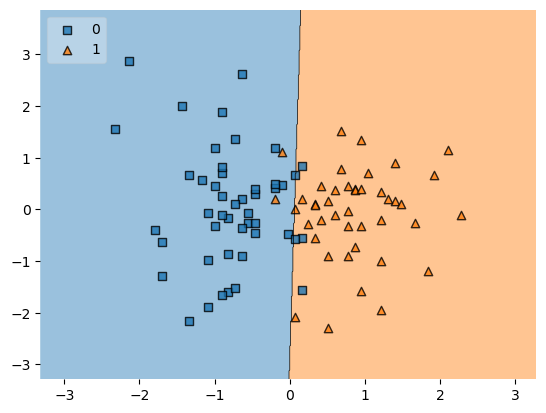

In [32]:
plot_decision_regions(x_train,y_train.values.flatten(),clf=clf,legend=2)

#flatten() function is used to convert a 2D array to a 1D array.
# x_train and y_train should be an array so dtype(x_train) is already array and we convert y_train to array using .values

In [33]:
type(x_train)

numpy.ndarray

In [34]:
x_train

array([[-8.17079103e-01, -1.58906781e-01],
       [-1.34739487e+00, -2.15692587e+00],
       [ 7.73868189e-01, -3.16645130e-01],
       [ 1.55166464e-01,  2.09149367e-01],
       [-6.40307182e-01,  2.09149367e-01],
       [ 7.73868189e-01, -2.74581571e-02],
       [ 1.65772780e+00, -2.64065681e-01],
       [ 1.55166464e-01, -5.53252654e-01],
       [-4.63535261e-01,  2.88018541e-01],
       [ 2.27642952e+00, -1.06327332e-01],
       [ 1.21579799e+00, -1.94660807e+00],
       [-5.51921221e-01, -2.64065681e-01],
       [ 1.39256991e+00,  1.56569917e-01],
       [ 1.55166464e-01,  8.40102763e-01],
       [ 4.20324347e-01, -2.11486231e-01],
       [ 1.21579799e+00,  3.40597991e-01],
       [-1.09991418e-01,  4.72046615e-01],
       [-1.17062295e+00,  5.77205514e-01],
       [-1.08223699e+00, -9.73888252e-01],
       [ 8.62254150e-01,  3.93177441e-01],
       [ 9.50640111e-01, -3.16645130e-01],
       [ 5.97096268e-01,  3.66887716e-01],
       [-1.98377378e-01,  4.19467165e-01],
       [ 5.

In [35]:
type(y_train.values)

numpy.ndarray

In [36]:
x_val=np.array([[-0.63208574,  2.44577496],
       [ 1.67177818, -0.2529736 ],
       [-1.4295771 ,  1.85695709],
       [-0.45486544, -0.2529736 ],
       [-1.34096695,  0.60571912],
       [ 1.05150712, -1.87222274],
       [ 1.93760863,  0.60571912],
       [-1.69540755, -0.59645069],
       [ 0.16540561, -1.45514342],
       [-0.80930604, -0.81725739],
       [ 0.96289697, -1.47967749],
       [ 1.22872742, -0.93992778]])
x_val

array([[-0.63208574,  2.44577496],
       [ 1.67177818, -0.2529736 ],
       [-1.4295771 ,  1.85695709],
       [-0.45486544, -0.2529736 ],
       [-1.34096695,  0.60571912],
       [ 1.05150712, -1.87222274],
       [ 1.93760863,  0.60571912],
       [-1.69540755, -0.59645069],
       [ 0.16540561, -1.45514342],
       [-0.80930604, -0.81725739],
       [ 0.96289697, -1.47967749],
       [ 1.22872742, -0.93992778]])

In [37]:
clf.predict(x_val)

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [38]:
y_train.tail(12)

,placement
6,0
82,1
27,1
58,1
30,1
15,0
97,1
9,0
99,1
95,0
